In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
class DataLoader:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None

    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print("Dataset Loaded Successfully!")
        print(f"\nShape of Dataset: {self.data.shape}")
        print("\nFirst 5 Rows (Head):\n", self.data.head())
        print("\nLast 5 Rows (Tail):\n", self.data.tail())
        print("\nℹDataset Info:")
        print(self.data.info())
        return self.data
    
file_path = "Loan.csv"
loader = DataLoader(file_path)
data = loader.load_data()


Dataset Loaded Successfully!

Shape of Dataset: (614, 13)

First 5 Rows (Head):
     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban

In [3]:
class DataPreprocessor:
    def __init__(self, data):
        self.data = data

    def preprocess(self):
        print("\nData Preprocessing Started...")

        # Encode categorical columns
        label_enc = LabelEncoder()
        for col in self.data.select_dtypes(include='object').columns:
            self.data[col].fillna(self.data[col].mode()[0], inplace=True)
            self.data[col] = label_enc.fit_transform(self.data[col])
        print("Categorical columns encoded.")

        # Scale numerical columns
        scaler = StandardScaler()
        numeric_cols = self.data.select_dtypes(include=['int64', 'float64']).columns
        for col in numeric_cols:
            self.data[col].fillna(self.data[col].mean(), inplace=True)
        self.data[numeric_cols] = scaler.fit_transform(self.data[numeric_cols])
        print("Numerical columns scaled.")

        print("\nPreprocessed Data (first 5 rows):\n", self.data.head())
        return self.data

preprocessor = DataPreprocessor(data)
data = preprocessor.preprocess()


Data Preprocessing Started...
Categorical columns encoded.
Numerical columns scaled.

Preprocessed Data (first 5 rows):
     Loan_ID    Gender   Married  Dependents  Education  Self_Employed  \
0 -1.729232  0.472343 -1.372089   -0.737806  -0.528362      -0.392601   
1 -1.723590  0.472343  0.728816    0.253470  -0.528362      -0.392601   
2 -1.717948  0.472343  0.728816   -0.737806  -0.528362       2.547117   
3 -1.712307  0.472343  0.728816   -0.737806   1.892641      -0.392601   
4 -1.706665  0.472343 -1.372089   -0.737806  -0.528362      -0.392601   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.072991          -0.554487    0.000000          0.279851   
1        -0.134412          -0.038732   -0.219273          0.279851   
2        -0.393747          -0.554487   -0.957641          0.279851   
3        -0.462062           0.251980   -0.314547          0.279851   
4         0.097728          -0.554487   -0.064454          0.279851   

   Credit_Hi

C:\Users\Rajpoot Bhatti\AppData\Local\Temp\ipykernel_14232\1344646242.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.data[col].fillna(self.data[col].mode()[0], inplace=True)
C:\Users\Rajpoot Bhatti\AppData\Local\Temp\ipykernel_14232\1344646242.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [20]:
class DataCleaner:
    def __init__(self, data):
        self.data = data

    def clean(self):
        print("\nCleaning Data...")
        before = self.data.shape[0]
        self.data.drop_duplicates(inplace=True)
        after = self.data.shape[0]
        print(f"Removed {before - after} duplicate rows (if any).")
        return self.data
    
cleaner = DataCleaner(data)
data = cleaner.clean()


Cleaning Data...
Removed 0 duplicate rows (if any).


In [8]:
class DataAnalyzer:
    def __init__(self, data):
        self.data = data

    def summary_statistics(self):
        print("\n Summary Statistics:\n")
        print(self.data.describe(include='all'))

    def feature_understanding(self):
       print("\nFeature Understanding:")
       for col in self.data.columns:
            print(f"{col} → {self.data[col].dtype}")
            
analyzer = DataAnalyzer(data)
analyzer.summary_statistics()
analyzer.feature_understanding()


 Summary Statistics:

          Loan_ID        Gender       Married    Dependents     Education  \
count  614.000000  6.140000e+02  6.140000e+02  6.140000e+02  6.140000e+02   
mean     0.000000 -8.100650e-17  6.654105e-17  2.893089e-18  1.735854e-17   
std      1.000815  1.000815e+00  1.000815e+00  1.000815e+00  1.000815e+00   
min     -1.729232 -2.117107e+00 -1.372089e+00 -7.378063e-01 -5.283622e-01   
25%     -0.864616  4.723426e-01 -1.372089e+00 -7.378063e-01 -5.283622e-01   
50%      0.000000  4.723426e-01  7.288155e-01 -7.378063e-01 -5.283622e-01   
75%      0.864616  4.723426e-01  7.288155e-01  2.534696e-01 -5.283622e-01   
max      1.729232  4.723426e-01  7.288155e-01  2.236021e+00  1.892641e+00   

       Self_Employed  ApplicantIncome  CoapplicantIncome    LoanAmount  \
count   6.140000e+02     6.140000e+02       6.140000e+02  6.140000e+02   
mean   -3.761016e-17    -4.339634e-18       4.050325e-17  5.786179e-18   
std     1.000815e+00     1.000815e+00       1.000815e+00  1.0


Generating Visualizations...

Plotting Histograms for Numerical Features...


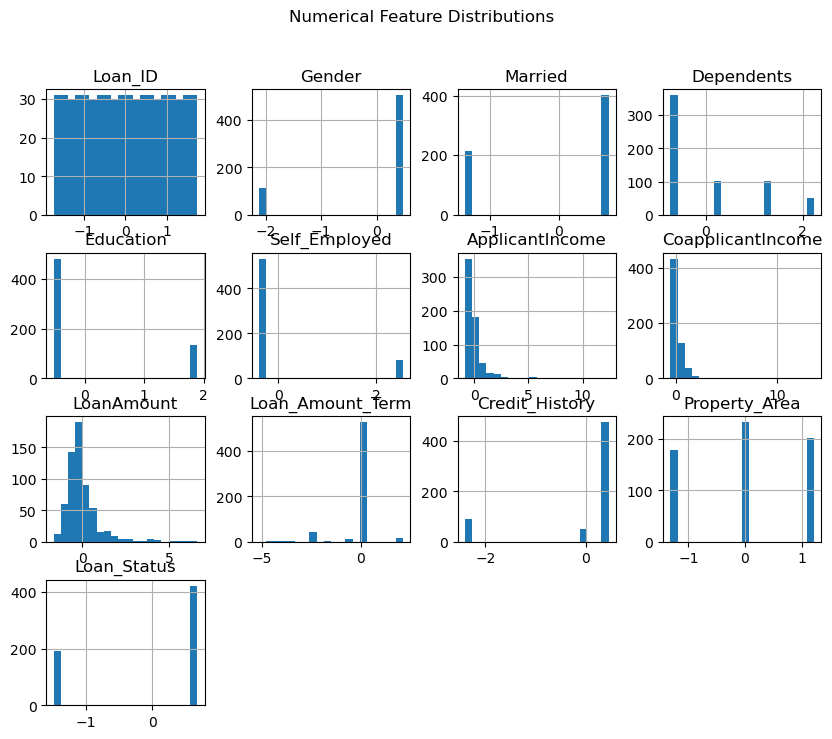


Plotting Countplots for Categorical Columns...

Plotting Boxplots for Numerical Columns...


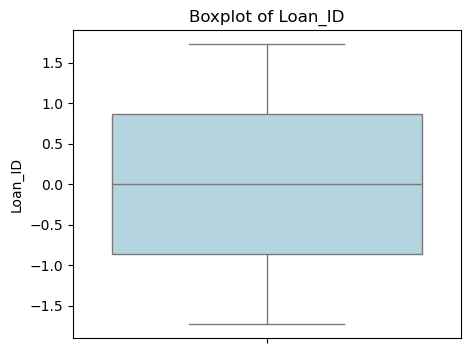

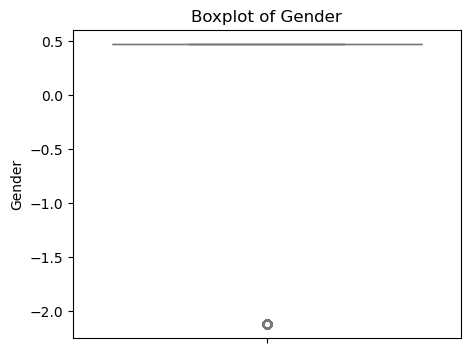

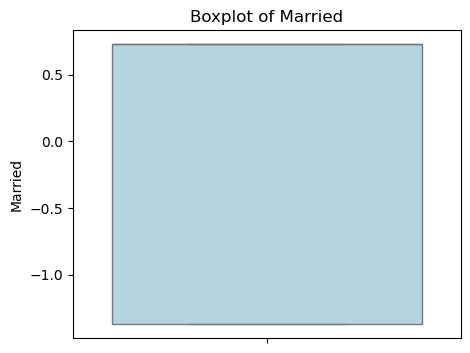

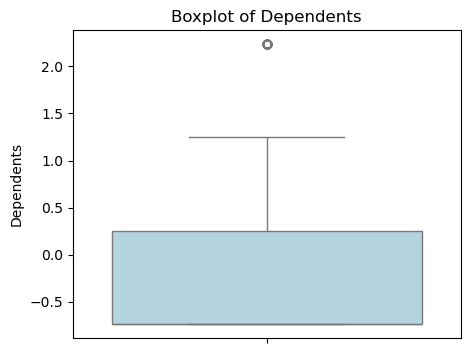

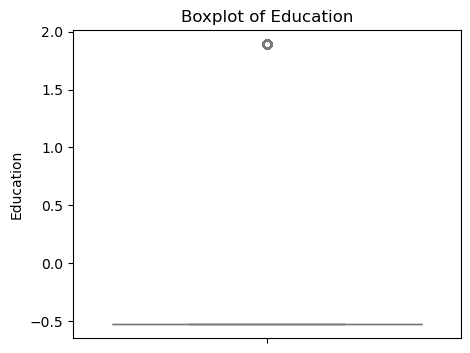

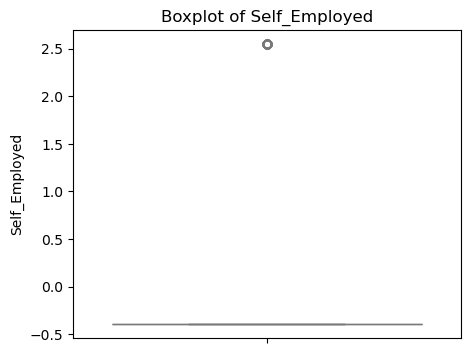

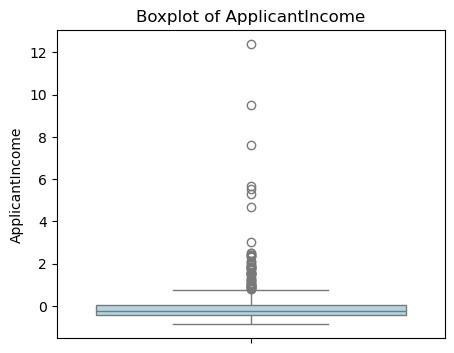

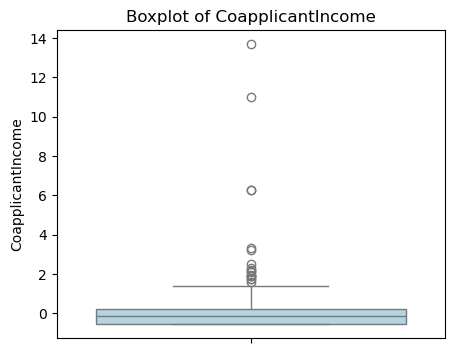

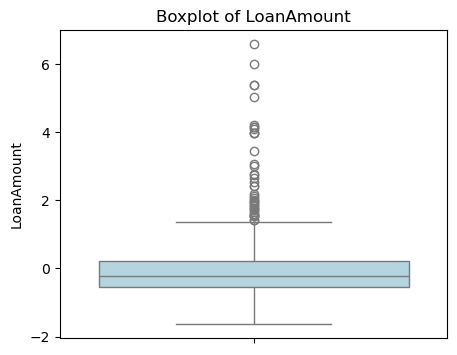

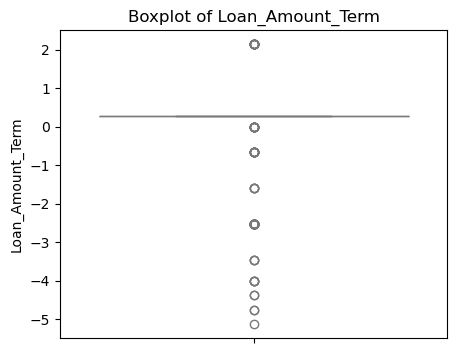

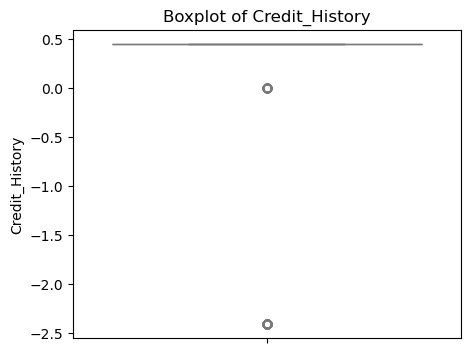

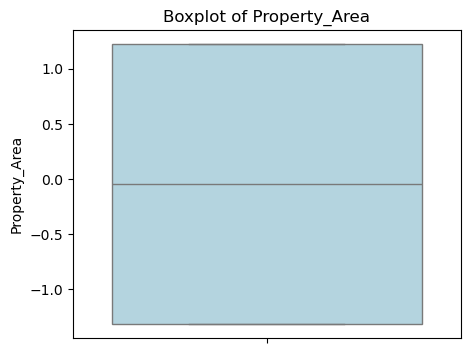

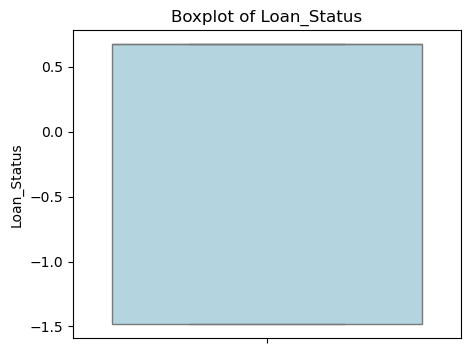


Generating Correlation Heatmap...


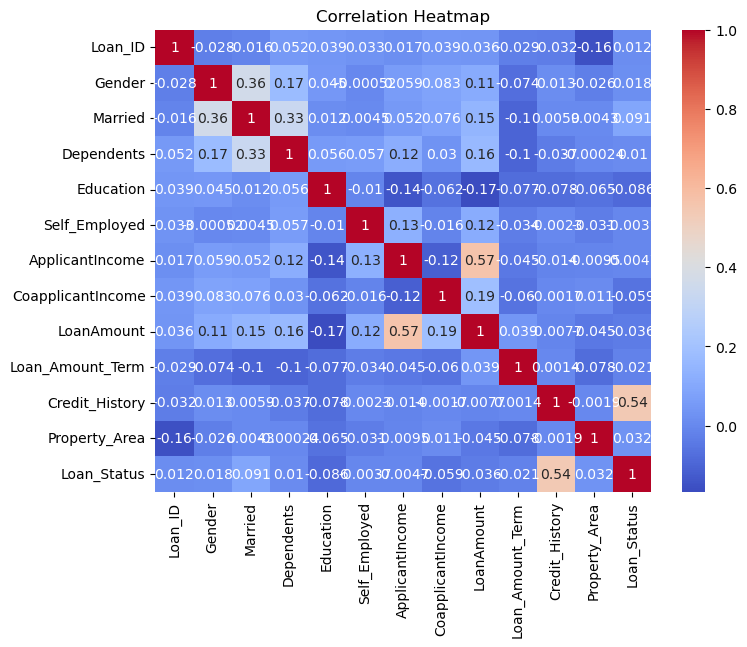


Plotting Loan Status Count...


C:\Users\Rajpoot Bhatti\AppData\Local\Temp\ipykernel_14232\29617966.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.data, x='Loan_Status', palette='pastel')


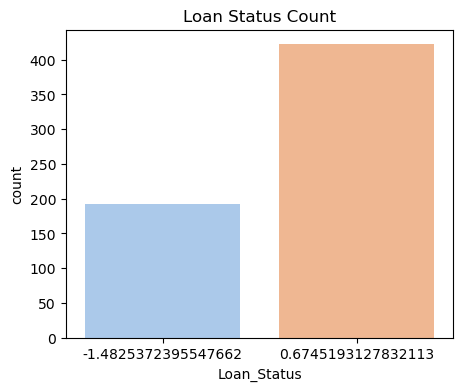


All Visualizations Generated Successfully!


In [7]:
class DataVisualizer:
    def __init__(self, data):
        self.data = data

    def visualize(self):
        """Generate detailed visualizations"""
        print("\nGenerating Visualizations...")

        #Histograms
        print("\nPlotting Histograms for Numerical Features...")
        self.data.hist(figsize=(10, 8), bins=20)
        plt.suptitle("Numerical Feature Distributions")
        plt.show()

        # Countplots for all categorical columns
        print("\nPlotting Countplots for Categorical Columns...")
        categorical_cols = self.data.select_dtypes(include='int64').columns
        for col in categorical_cols:
            plt.figure(figsize=(5, 4))
            sns.countplot(data=self.data, x=col, palette="pastel")
            plt.title(f"Countplot of {col}")
            plt.show()

        # Boxplots
        print("\nPlotting Boxplots for Numerical Columns...")
        numeric_cols = self.data.select_dtypes(include=['float64']).columns
        for col in numeric_cols:
            plt.figure(figsize=(5, 4))
            sns.boxplot(y=self.data[col], color='lightblue')
            plt.title(f"Boxplot of {col}")
            plt.show()

        #Correlation heatmap
        print("\nGenerating Correlation Heatmap...")
        plt.figure(figsize=(8, 6))
        sns.heatmap(self.data.corr(numeric_only=True), annot=True, cmap="coolwarm")
        plt.title("Correlation Heatmap")
        plt.show()

        #Special Loan_Status Countplot (if column exists)
        if 'Loan_Status' in self.data.columns:
            print("\nPlotting Loan Status Count...")
            plt.figure(figsize=(5, 4))
            sns.countplot(data=self.data, x='Loan_Status', palette='pastel')
            plt.title("Loan Status Count")
            plt.show()

        print("\nAll Visualizations Generated Successfully!")
        
visualizer = DataVisualizer(data)
visualizer.visualize()